# Titanic Lab 

I will be conducting EDA on a passenger titanic data set in order to determine what impacted survivial rates of titanic passengers.

In [2]:
#importing libraries

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('train.csv')

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cleaning the data 

- Create a bar chart showing how many missing values are in each column
- Which column has the most NaN values? How many cells in that column are empty?
- Delete all rows where Embarked is empty
- Fill all empty cabins with ¯\(ツ)/¯

Note: NaN, empty, and missing are synonymous.
Cabin and Age have the most nulls:

In [1]:
#pip install missingno

In [5]:
import missingno as msno 

<AxesSubplot:>

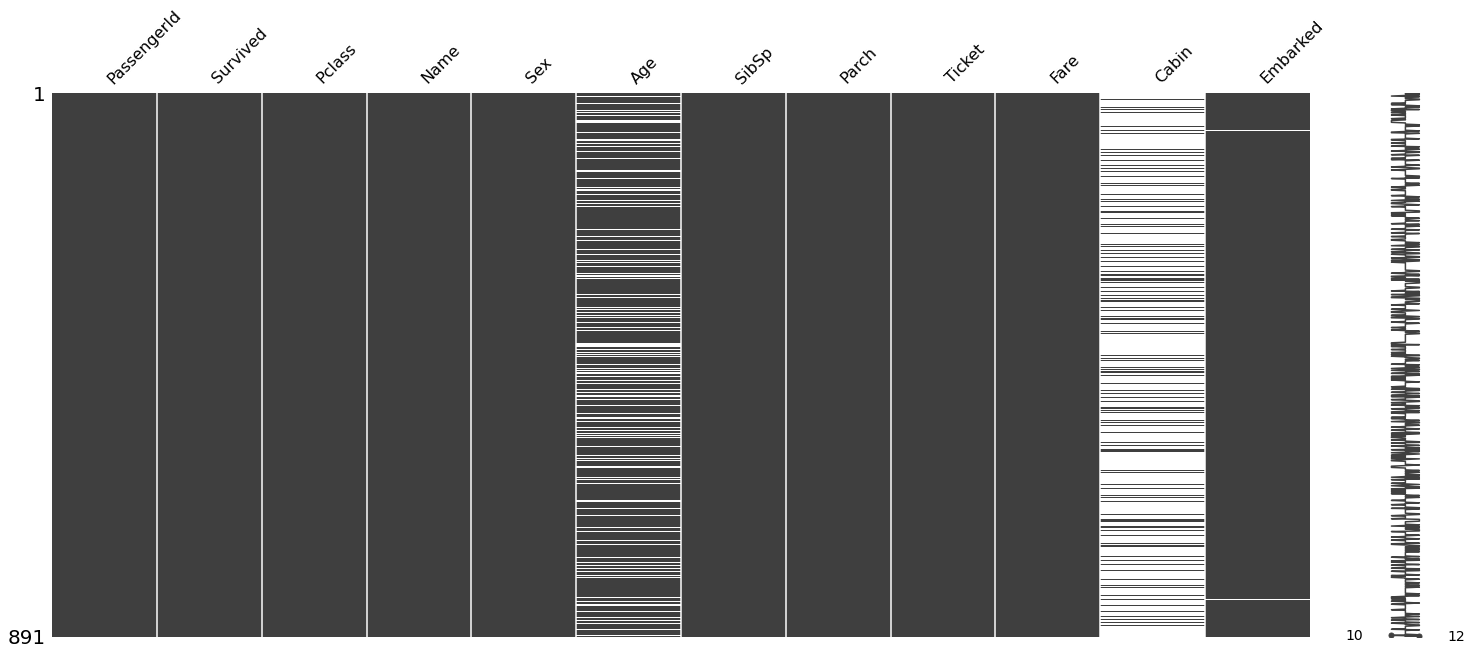

In [13]:
#looking at missing values 

msno.matrix(df)

<AxesSubplot:>

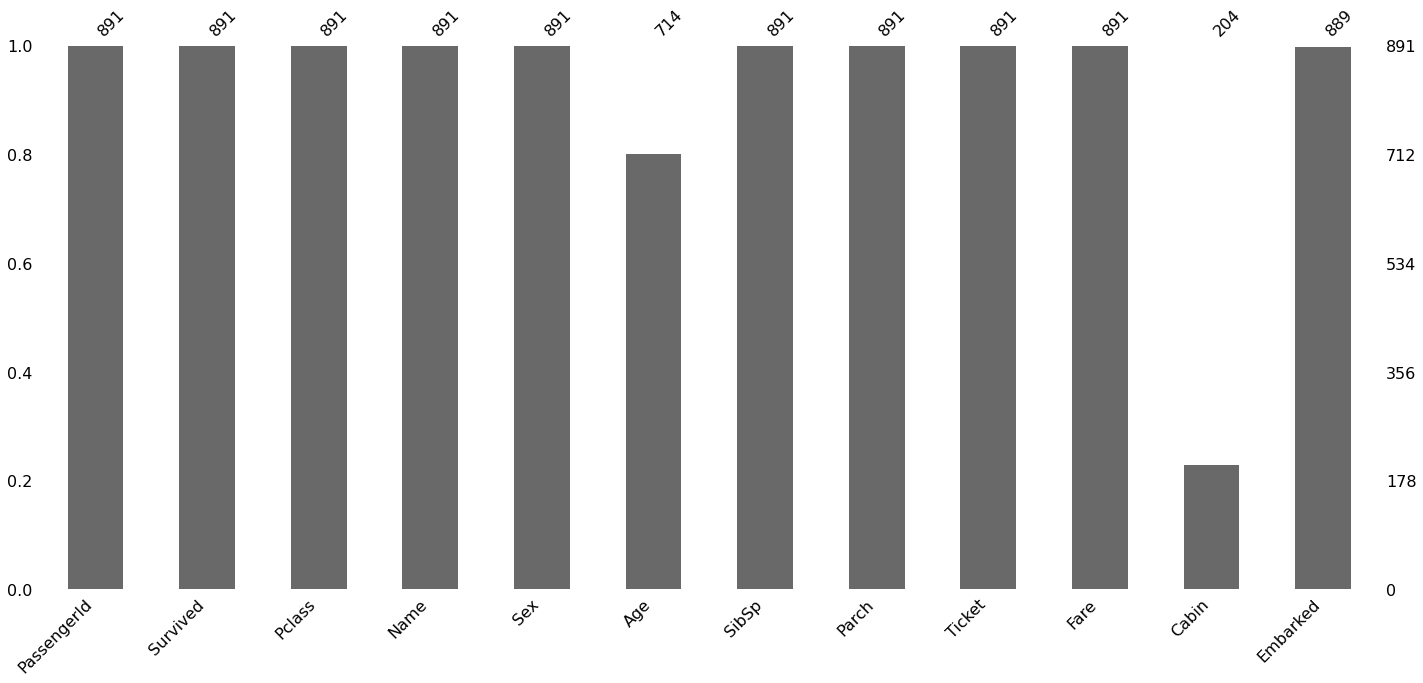

In [14]:
msno.bar(df) 

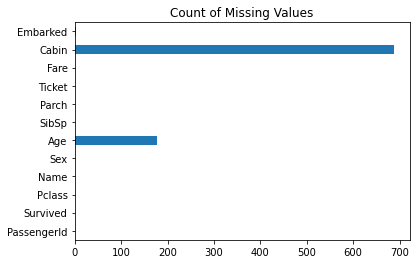

In [4]:
df.isnull().sum().plot(kind='barh')
plt.title('Count of Missing Values');

In [15]:
#barplot displas the information below, Age, Cabin, and Embarked missing values. 

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

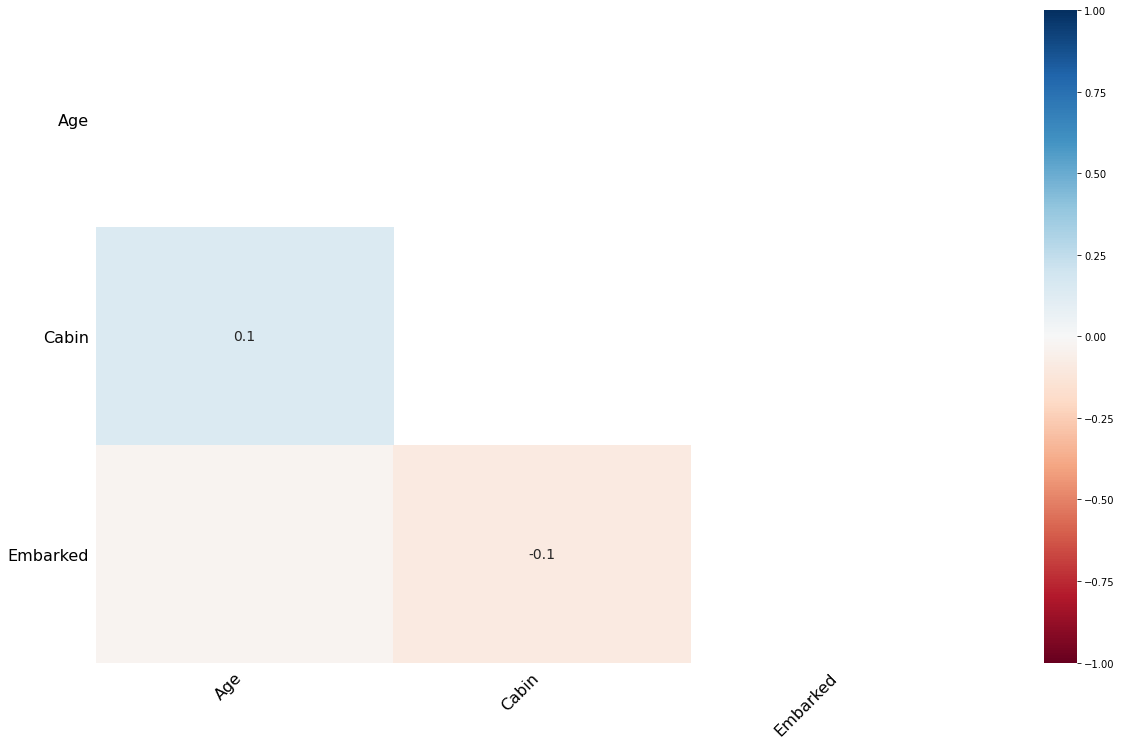

In [16]:
msno.heatmap(df)

Which column has the most NaN values? How many cells in that column are empty?

* Cabin has the most NaN values, 687 cells are that column are empty 

In [41]:
#getting rid of rows in Embarked that have null values 

df = df[df['Embarked'].notna()]

df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [153]:
#Fill all empty cabins with ¯\(ツ)/¯


df['Cabin'] = df['Cabin'].fillna('¯\(ツ)/¯')

In [46]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Step 3: Feature extraction


- There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called FamilyCount which will be the sum of those two columns.
- Reverends have a special title in their name. Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.
- In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using pd.get_dummies
    - Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column
    - Do the same thing for Sex
    - BONUS: Extract the title from everyone's name and create dummy columns

In [17]:
 #Create a new column called FamilyCount which will be the sum of those two columns.
    
df['FamilyCount'] = df['SibSp'] + df["Parch"]

df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [6]:
#Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.

rev = 'Rev.'

reverands = []

for x in df['Name']:
    if rev in x:
        print(x)
        reverands.append(x)

Byles, Rev. Thomas Roussel Davids
Bateman, Rev. Robert James
Carter, Rev. Ernest Courtenay
Kirkland, Rev. Charles Leonard
Harper, Rev. John
Montvila, Rev. Juozas


In [81]:
df['IsReverend'] = 0

In [82]:
df.loc[df['Name'].str.contains('Rev'), 'IsReverend'] = 1

In [29]:
##Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.
rev = 'Rev.'

df['IsReverend'] = df['Parch']

rev = 'Rev.'

for name in df['Name']:
    if rev in name: 
        df['IsReverend'] = 1
        print('Found')
    else:
        df['IsReverend'] = 0

Found
Found
Found
Found
Found
Found


In [83]:
df['IsReverend'].value_counts()

0    885
1      6
Name: IsReverend, dtype: int64

In [31]:
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]

# add dataset_title to the main dataset named 'Title'
df["Title"] = pd.Series(dataset_title)

# count
df["Title"].value_counts()


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Lady              1
Don               1
the Countess      1
Jonkheer          1
Sir               1
Mme               1
Capt              1
Name: Title, dtype: int64

# Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. 
#These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column
#DO for Sex too. 




In [69]:
dum_sex = pd.get_dummies(df['Sex'])

dum_sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [80]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Title,FamilyName,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,Braund,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,Cumings,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,Heikkinen,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,Futrelle,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,Allen,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Rev,Montvila,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Miss,Graham,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,Miss,Johnston,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,Mr,Behr,0


In [12]:
#for column in df['Name','Embarked']:
    #dummies = pd.get_dummies(df[column])
    #df[dummies.columns] = dummies
    
dum_embarked = pd.get_dummies(df['Embarked'])

In [71]:
df = pd.concat([df, pd.get_dummies(df['Embarked'])], axis=1); df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsReverend,Title,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Rev,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Miss,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,Miss,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,Mr,1,0,0


In [14]:
dum_embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [56]:
dum_sex = pd.get_dummies(df['Sex'])

In [57]:
dum_sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [72]:
df = pd.concat([df, pd.get_dummies(df['Sex'])], axis=1); df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsReverend,Title,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Rev,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Miss,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,Miss,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,Mr,1,0,0,0,1


# Exploratory Analysis

* What was the survival rate overall?
* Which gender fared the worst? What was their survival rate?
* What was the survival rate for each Pclass?
* Did any reverends survive? How many?
* What is the survival rate for cabins marked shrug emoji
* What is the survival rate for people whose Age is empty?
* What is the survival rate for each port of embarkation?
* What is the survival rate for children (under 12) in each Pclass?
* Did the captain of the ship survive? Is he on the list?
* Of all the people that died, who had the most expensive ticket? How much did it cost?
* Does having family on the boat help or hurt your chances of survival?


In [101]:
#What was the survival rate overall?

df['Survived'].value_counts()


0    549
1    340
Name: Survived, dtype: int64

In [105]:
#In percentage 

df["Survived"].value_counts() * 100/len(df)

0    61.754781
1    38.245219
Name: Survived, dtype: float64

38% survived

# Gender Differences

In [118]:
#Which gender fared the worst? What was their survival rate?

df[df['Sex'] == 'male']['Survived'].value_counts() * 100 / len(df)

0    52.643420
1    12.260967
Name: Survived, dtype: float64

<AxesSubplot:>

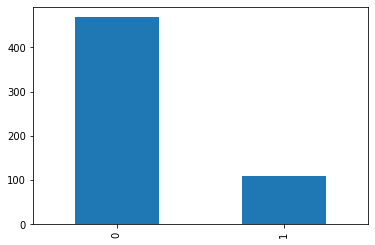

In [117]:
df[df['Sex'] == 'male']['Survived'].value_counts().plot(kind = 'bar')  

In [115]:
df[df['Sex'] == 'female']['Survived'].value_counts() * 100 / len(df)

1    25.984252
0     9.111361
Name: Survived, dtype: float64

<AxesSubplot:>

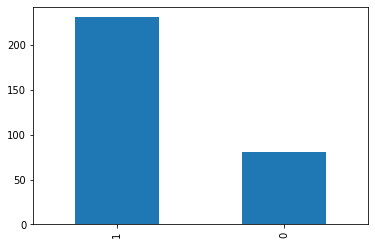

In [111]:
df[df['Sex'] == 'female']['Survived'].value_counts().plot(kind = 'bar')

Gender conclusions: 
* Men fared worse than woman 
* Male survivial rate is 12% 
* female survivial rate is 25%

# What was the survival rate for each Pclass?

In [14]:
table = pd.crosstab(df['Survived'],df['Pclass'])
print(table)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [137]:
df[df['Pclass'] == 1]['Survived'].value_counts() * 100 / len(df['Pclass'])

#more passengers in first class survived than died. 

1    15.073116
0     8.998875
Name: Survived, dtype: float64

In [142]:
df[df['Pclass'] == 1]['Survived'].value_counts() * 100 / len(df[df['Pclass'] == 1])

1    62.616822
0    37.383178
Name: Survived, dtype: float64

<AxesSubplot:>

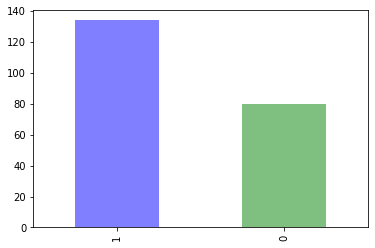

In [227]:
df[df['Pclass'] == 1]['Survived'].value_counts().plot(kind='bar', color=['b','g'], alpha = alpha_color)

In [135]:
df[df['Pclass'] == 2]['Survived'].value_counts() * 100 / len(df['Pclass'])

#2nd class more evenly split between survived and not

0    10.911136
1     9.786277
Name: Survived, dtype: float64

In [144]:
df[df['Pclass'] == 2]['Survived'].value_counts() * 100 / len(df[df['Pclass'] == 2])

0    52.717391
1    47.282609
Name: Survived, dtype: float64

<AxesSubplot:>

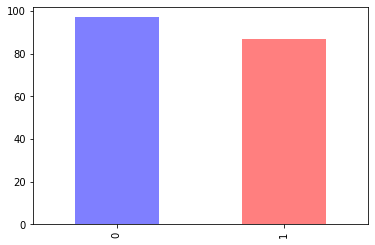

In [226]:
df[df['Pclass'] == 2]['Survived'].value_counts().plot(kind='bar', color=['b','r'], alpha = alpha_color)

In [134]:
df[df['Pclass'] == 3]['Survived'].value_counts() * 100 / len(df['Pclass'])

#looks like majority of 3rd class passengers did not survive 

0    41.844769
1    13.385827
Name: Survived, dtype: float64

In [145]:
df[df['Pclass'] == 3]['Survived'].value_counts() * 100 / len(df[df['Pclass'] == 3])

0    75.763747
1    24.236253
Name: Survived, dtype: float64

<AxesSubplot:>

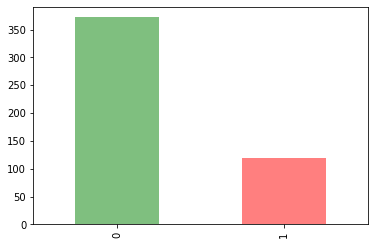

In [225]:
df[df['Pclass'] == 3]['Survived'].value_counts().plot(kind='bar', color=['g','r'], alpha = alpha_color)

In [12]:
df.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass'>

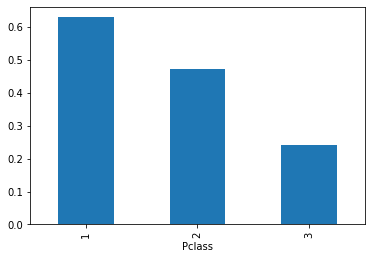

In [15]:
df.groupby('Pclass').Survived.mean().plot(kind = 'bar')

Total rates: 

* Survivial rate for 1st class = 15% of people in first class survived, 

* Survivial rate for 2nd class = 9% , compared to 10%  second class who died in second class. 

* Survivial rate for 3rd class = 13%, compared to 41% who died in third class 


Rates just among their class: 

* 62% of people in first class survived 
* 47 % of people in 2nd class survived 
* 24 % of people in first class survived



# Did any reverends survive? How many?

In [55]:
df[df.Name.str.contains("Rev.")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsReverend,Title
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,NaN,S,0,Rev
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,NaN,S,0,Rev
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,NaN,S,0,Rev
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NaN,Q,0,Rev
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,NaN,S,0,Rev
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S,0,Rev


In [15]:
reverands

['Byles, Rev. Thomas Roussel Davids',
 'Bateman, Rev. Robert James',
 'Carter, Rev. Ernest Courtenay',
 'Kirkland, Rev. Charles Leonard',
 'Harper, Rev. John',
 'Montvila, Rev. Juozas']

In [17]:
for name in reverands:
    for x in df['Name']:
        if x == name:
            print(name)

Byles, Rev. Thomas Roussel Davids
Bateman, Rev. Robert James
Carter, Rev. Ernest Courtenay
Kirkland, Rev. Charles Leonard
Harper, Rev. John
Montvila, Rev. Juozas


In [37]:
df[df['Title'] == 'Rev']['Survived'].value_counts()

0    6
Name: Survived, dtype: int64

<AxesSubplot:>

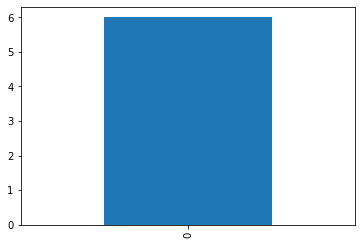

In [38]:
df[df['Title'] == 'Rev']['Survived'].value_counts().plot(kind = 'bar')

All the Reverands died.

In [41]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

# What is the survival rate for cabins marked ¯\(ツ)/¯

In [154]:
df[df['Cabin'] == '¯\(ツ)/¯']['Survived'].value_counts()

0    481
1    206
Name: Survived, dtype: int64

In [156]:
#totals

df[df['Cabin'] == '¯\(ツ)/¯']['Survived'].value_counts() * 100 /len(df)

0    54.105737
1    23.172103
Name: Survived, dtype: float64

In [157]:
#of the cabins marked shrug face

df[df['Cabin'] == '¯\(ツ)/¯']['Survived'].value_counts() * 100 /len(df[df['Cabin'] == '¯\(ツ)/¯'])

0    70.014556
1    29.985444
Name: Survived, dtype: float64

<AxesSubplot:>

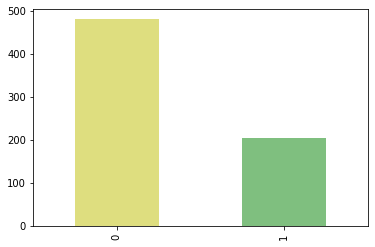

In [222]:
df[df['Cabin'] == '¯\(ツ)/¯']['Survived'].value_counts().plot(kind = 'bar', color=['y','g'], alpha = alpha_color)

# What is the survival rate for people whose Age is empty?

In [167]:
df[df['Age'].isnull() == True]['Survived'].value_counts()

0    125
1     52
Name: Survived, dtype: int64

<AxesSubplot:>

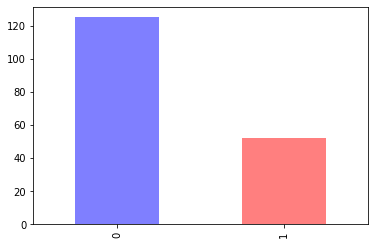

In [220]:
alpha_color = 0.5

df[df['Age'].isnull() == True]['Survived'].value_counts().plot(kind = 'bar', color=['b','r'], alpha = alpha_color)

In [169]:
df[df['Age'].isnull() == True]['Survived'].value_counts() * 100 / len(df)

0    14.060742
1     5.849269
Name: Survived, dtype: float64

In [170]:
df[df['Age'].isnull() == True]['Survived'].value_counts() * 100 / len(df[df['Age'].isnull() == True])

0    70.621469
1    29.378531
Name: Survived, dtype: float64

Totals: 
* 14% of people who survived had empty age columns 
* of just the people whose age's were empty 29% of them survived 

# The survival rate for each port of embarkation


In [201]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Title,FamilyName,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,Mr,Braund,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,Cumings,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,Miss,Heikkinen,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,Futrelle,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,Mr,Allen,0


In [199]:
df[df['Embarked'] == 'S']['Survived'].value_counts() 

0    427
1    217
Name: Survived, dtype: int64

In [214]:
df[df['Embarked'] == 'S']['Survived'].value_counts() * 100 / len(df)

0    48.031496
1    24.409449
Name: Survived, dtype: float64

In [202]:
df[df['Embarked'] == 'C']['Survived'].value_counts()

1    93
0    75
Name: Survived, dtype: int64

In [215]:
df[df['Embarked'] == 'C']['Survived'].value_counts() * 100 / len(df)

1    10.461192
0     8.436445
Name: Survived, dtype: float64

In [203]:
df[df['Embarked'] == 'Q']['Survived'].value_counts()

0    47
1    30
Name: Survived, dtype: int64

In [216]:
df[df['Embarked'] == 'Q']['Survived'].value_counts() * 100 / len(df)

0    5.286839
1    3.374578
Name: Survived, dtype: float64

conclusions

# What is the survival rate for children (under 12) in each Pclass?

In [54]:
df[(df['Age'] < 12) & (df['Pclass'] == 3)]['Survived'].value_counts()

0    28
1    19
Name: Survived, dtype: int64

In [75]:
df[(df['Age'] < 12) & (df['Pclass'] == 3)]['Survived'].value_counts() * 100 / len(df[(df['Age'] < 12)])

0    41.176471
1    27.941176
Name: Survived, dtype: float64

In [76]:
df[(df['Age'] < 12) & (df['Pclass'] == 2)]['Survived'].value_counts()df[(df['Age'] < 12) & (df['Pclass'] == 1)]['Survived'].value_counts()

1    25.0
Name: Survived, dtype: float64

In [52]:
df[(df['Age'] < 12) & (df['Pclass'] == 1)]['Survived'].value_counts()

1    3
0    1
Name: Survived, dtype: int64

In [78]:
df[(df['Age'] < 12) & (df['Pclass'] == 1)]['Survived'].value_counts() * 100 / len(df[(df['Age'] < 12)])

1    4.411765
0    1.470588
Name: Survived, dtype: float64

## Takeaways: For children under the age of 12 
 - 41% of children under the age of 12 and in class 3 did not survive, this means more children in p class 3 died than lived.
 - All of the children under 12 in class 2 survived, (25%) of total children under 12 
 -  There were significantly less children under age 12 in P class 1 however most of them survived. 

# Did the captain of the ship survive? Is he on the list?

<AxesSubplot:>

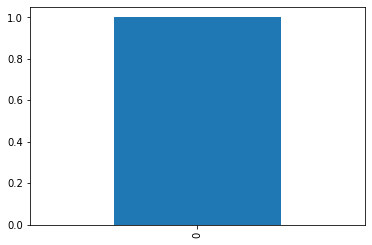

In [42]:
df[df['Title'] == 'Capt']['Survived'].value_counts().plot(kind = 'bar')

In [43]:
df[df['Title'] == 'Capt']['Survived'].value_counts()

0    1
Name: Survived, dtype: int64

He's on the list but he did not survive. 

# Of all the people that died, who had the most expensive ticket? How much did it cost?

In [ ]:
#idk

In [44]:
index = np.where(df['Fare'] == (df['Fare'].max()))
df.loc[index]                   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsReverend,Title
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,0,Miss
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,0,Mr
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0,Mr


In [279]:
df['Fare'].max()

512.3292

The highest fare out there survived, now to find out which of the people who died had the highest fare

In [50]:
df[df['Survived'] == 0]['Fare'].max()

263.0

# Does having family on the boat help or hurt your chances of survival?

In [254]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,Title,FamilyName,IsReverend,Agebin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,Mr,Braund,0,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,Cumings,0,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,Miss,Heikkinen,0,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,Futrelle,0,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,Mr,Allen,0,"(30, 40]"


In [256]:
df['FamilyCount'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In [259]:
df[df['FamilyCount'] == 0]['Survived'].value_counts()

0    374
1    161
Name: Survived, dtype: int64

In [260]:
df[df['FamilyCount'] == 1]['Survived'].value_counts()

1    89
0    72
Name: Survived, dtype: int64

In [261]:
df[df['FamilyCount'] == 4]['Survived'].value_counts()

0    12
1     3
Name: Survived, dtype: int64

In [262]:
df[df['FamilyCount'] == 7]['Survived'].value_counts()

0    6
Name: Survived, dtype: int64

In [287]:
survived_grp = df.groupby(df['Survived'])
family = df['FamilyCount']



In [20]:
most_family = np.where(df['FamilyCount'] == max(df['FamilyCount']))

print(most_family)

(array([159, 180, 201, 324, 792, 846, 863]),)


# Extra plots

Text(0, 0.5, 'Number Survived')

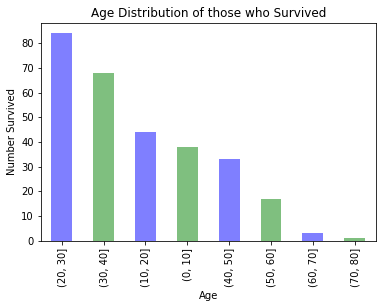

In [237]:
#age 

bins = [0,10,20,30,40,50,60,70,80]

df['Agebin'] = pd.cut(df['Age'], bins)

df[df['Survived']==1]['Agebin'].value_counts().plot(kind = 'bar', color=['b','g'], alpha = alpha_color)
plt.title('Age Distribution of those who Survived')
plt.xlabel('Age')
plt.ylabel('Number Survived')

Text(0, 0.5, 'Number died')

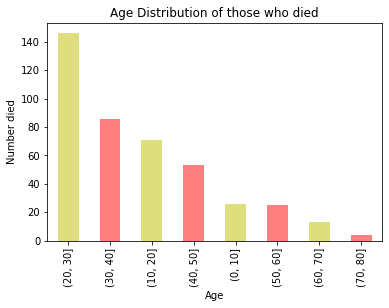

In [238]:
#age 

bins = [0,10,20,30,40,50,60,70,80]

df['Agebin'] = pd.cut(df['Age'], bins)

df[df['Survived']==0]['Agebin'].value_counts().plot(kind = 'bar', color=['y','r'], alpha = alpha_color)
plt.title('Age Distribution of those who died')
plt.xlabel('Age')
plt.ylabel('Number died')

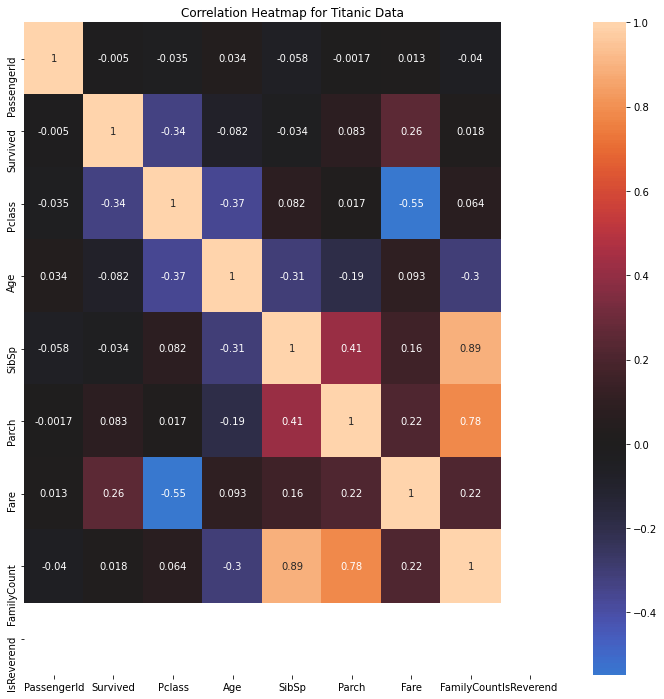

In [240]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(df.corr(),annot=True, center=0)
ax.set_title('Correlation Heatmap for Titanic Data');

# Class and Sex merged: A look at Intersectionality

<AxesSubplot:>

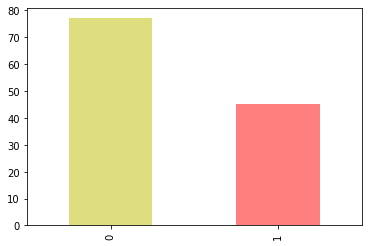

In [248]:
df[(df['Sex']== 'male') & (df['Pclass']==1)]['Survived'].value_counts().plot(kind='bar',color=['y','r'], alpha = alpha_color)


#majority of male passengers in first class did not survive

<AxesSubplot:>

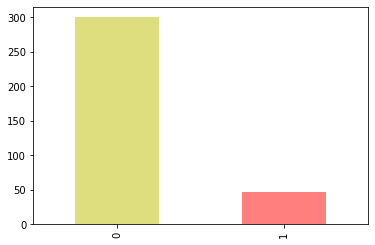

In [249]:
df[(df['Sex']== 'male') & (df['Pclass']==3)]['Survived'].value_counts().plot(kind='bar',color=['y','r'], alpha = alpha_color)

#even less men survived if they were also in third class 



<AxesSubplot:>

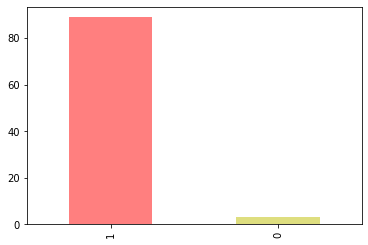

In [251]:
df[(df['Sex'] == 'female') & (df['Pclass'] ==1)]['Survived'].value_counts().plot(kind='bar',color=['r','y'], alpha = alpha_color)


#The majority of women in first class survived 

<AxesSubplot:>

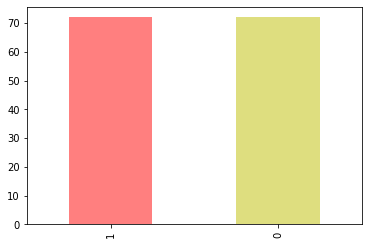

In [253]:
df[(df['Sex']=='female') & (df['Pclass'] == 3)]['Survived'].value_counts().plot(kind='bar',color=['r','y'], alpha = alpha_color)


#about half of the females in 3rd class survived 

## Takeaway 

Females are more likely to survive than males, females in first class are more likely to survive than females in third class. Class and gender play a role in determining survivial rates.

# Continued Data Exploration

<AxesSubplot:xlabel='Title', ylabel='Age'>

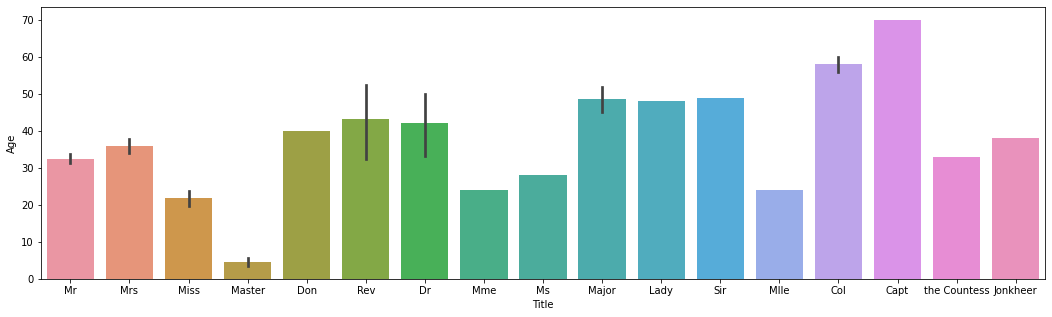

In [34]:
#plot based on titles

plt.figure(figsize=(18,5))
sns.barplot(x=df['Title'], y = df['Age'])

The plot above is designed to show the ages of people which hold different or special titles in their name 

Text(0.5, 1.0, 'Survivial by age')

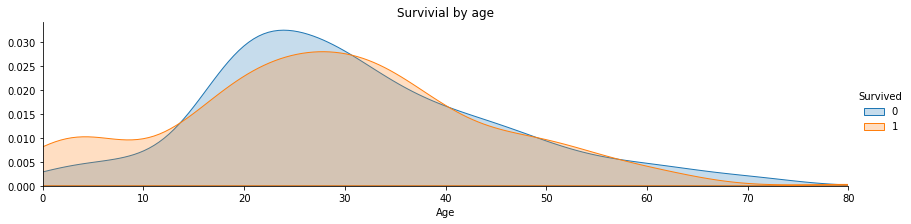

In [80]:
fig = sns.FacetGrid(df, hue = 'Survived', aspect = 4)
fig.map(sns.kdeplot, 'Age' , shade = True)
fig.set(xlim = (0, df['Age'].max()))
fig.add_legend()
plt.title('Survivial by age')

# Conclusions
 Class and gender play a role in determining survivial rates. A passenger is more likely to survive if they're in first class than third and more likely to survive if they are female than male. 